In [1]:
import json
import os
from collections import Counter
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
os.getcwd()

'/home/chankoo/GitHub/BOAZ-projects/airbnb-NLP'

In [3]:
os.chdir('./../airbnb-data')

In [6]:
review_lst = glob.glob('review_*_*.json')
review_lst

['review_jeju_143957.json',
 'review_jeonju_13647.json',
 'review_seoul_326990.json',
 'review_seogwipo_51728.json',
 'review_busan_70028.json',
 'review_daegu_33689.json']

In [7]:
review = {}
for file in review_lst:
    with open(file,'r',encoding='utf-8') as fp:
        review.update(json.load(fp))

In [8]:
# merge한 데이터 json으로 저장한다
# with open('review_raw.json','w',encoding='utf-8') as fp:
#     json.dump(review,fp,ensure_ascii=False)

In [9]:
len(review.keys())  # 숙소id 개수

28853

In [10]:
list(review.values())[0][0] # 데이터 구조를 보자. 숙소id를 key로, 리뷰들의 리스트를 value로 갖는다

{'collection_tag': None,
 'comments': '사진으로 보고 기대했던 것과 많이 달라서 실망했습니다. 소파와 티비, 가구등 시설이 노후했고 청결도도 눈에 보이는 곳 외에는 만족스럽지 않았습니다. 첫날 에어컨에서 냄새가 나고 차가운 바람이 나오지 않아서 더위에 고생했고, 가스레인지 1구 스위치가 고장나서 요리할때 가스가 샐까 불안했습니다. 전자도어락도 고장이 나서 겨우 잠그고 겨우 열고다녔습니다. 좋았던 점은 호스트분의 후속조치가 빨랐던 것과 숙소의 위치입니다. 숙소 위치의 장점 이외에는 이 가격으로 머물기에는 많이 실망스러웠습니다.',
 'created_at': '2018-07-07T05:16:02Z',
 'id': 286704207,
 'language': 'ko',
 'localized_date': '2018년 7월',
 'rating': 3,
 'response': '',
 'reviewee': {'deleted': False,
  'first_name': 'Haneul',
  'host_name': 'Haneul',
  'id': 9588907,
  'is_superhost': False,
  'picture_url': 'https://a0.muscache.com/im/pictures/e4a0a232-0135-4447-9a3c-e5e67a2eddbb.jpg?aki_policy=profile_x_medium',
  'profile_path': '/users/show/9588907'},
 'reviewer': {'deleted': False,
  'first_name': 'Yongseok',
  'host_name': 'Yongseok',
  'id': 198380133,
  'is_superhost': False,
  'picture_url': 'https://a0.muscache.com/im/pictures/user/0bfb71fb-9c94-4a50-8537-19e3d9af1d12.jpg?aki_policy=profile_x_me

다행스럽게도 리뷰별로 rating이 있다

In [11]:
ratings = {}
for k,vals in review.items():
    ratings[k] = []
    for val in vals:
        ratings[k].append(val['rating'])

In [12]:
rating_all = []
for vals in ratings.values():
    rating_all.extend(vals)

In [13]:
rating_count = Counter(rating_all)

In [14]:
rating_count # 대부분이 5점

Counter({3: 16779, 4: 104909, 5: 450345, 2: 3149, 1: 1886, 0: 4447})

In [15]:
sum(rating_count.values()) # 전체 rating 개수 == 전체 리뷰 개수

581515

평균구해보자

In [16]:
rate_all=0
for rate,cnt in rating_count.items():
    rate_all += rate*cnt
    

In [17]:
rate_all/sum(rating_count.values()) # 매우높은편 

4.694430926115405

언어분포를 보자

In [18]:
lang = []
for k,rev_lst in review.items():
    for rev in rev_lst:
        lang.append(rev['language'])

한국어와 영어가 대부분이다

NLP를 위해 하나의 언어로 번역필요하다. 영어로 진행할 예정

In [19]:
lang_cnt = Counter(lang)
sorted(lang_cnt.items(),key=lambda kv:kv[1],reverse=True)

[('ko', 276892),
 ('en', 238310),
 ('zh', 18580),
 ('zh-TW', 17945),
 ('zh-CN', 16200),
 ('ja', 6027),
 ('fr', 2362),
 ('ru', 1177),
 ('und', 917),
 ('es', 879),
 ('de', 789),
 ('th', 631),
 ('nl', 140),
 ('it', 108),
 ('id', 90),
 ('pt', 83),
 ('sv', 75),
 ('no', 48),
 ('da', 45),
 ('pl', 37),
 ('fi', 37),
 ('vi', 25),
 ('ms', 22),
 ('tr', 17),
 ('cs', 14),
 ('ca', 13),
 (None, 8),
 ('ar', 6),
 ('bg', 6),
 ('hu', 6),
 ('ro', 5),
 ('cy', 3),
 ('sl', 3),
 ('sq', 2),
 ('tl', 2),
 ('ht', 2),
 ('ceb', 1),
 ('mi', 1),
 ('af', 1),
 ('so', 1),
 ('la', 1),
 ('ky', 1),
 ('jw', 1),
 ('gl', 1),
 ('hi', 1)]

리뷰수를 숙소별로 세보자

In [20]:
review_cnt = {}
for k,v in review.items():
    review_cnt[k] = len(v)

In [21]:
revcnt_cnt = Counter([cnt for cnt in review_cnt.values()])

In [22]:
sorted(revcnt_cnt.items(),)[:30]

[(0, 6548),
 (1, 2775),
 (2, 1737),
 (3, 1207),
 (4, 1000),
 (5, 862),
 (6, 774),
 (7, 644),
 (8, 563),
 (9, 519),
 (10, 468),
 (11, 463),
 (12, 367),
 (13, 398),
 (14, 353),
 (15, 362),
 (16, 326),
 (17, 294),
 (18, 281),
 (19, 283),
 (20, 256),
 (21, 262),
 (22, 268),
 (23, 208),
 (24, 201),
 (25, 218),
 (26, 217),
 (27, 191),
 (28, 168),
 (29, 176)]

In [23]:
labels,counts = zip(*sorted(revcnt_cnt.items(),key=lambda kv:kv[0]))

In [24]:
labels = np.array(labels) # labels: 리뷰 수
counts = np.array(counts) # counts: 해당 리뷰수만큼 리뷰달린 숙소 수

Text(0.5,1,'Review Counts')

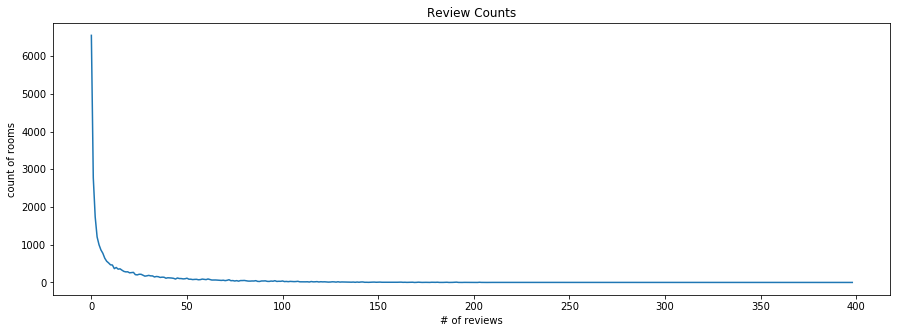

In [25]:
plt.figure(figsize=(15,5))
plt.plot(labels,counts)
plt.xlabel('# of reviews')
plt.ylabel('count of rooms')
plt.title('Review Counts')

추천시스템 구현을 위해서 유저-리뷰 정보가 필요하다

In [26]:
review['10030136'][0]['reviewer']['id'] # user_id이다. 숙소에 달린 리뷰들은 user_id 정보를 담고있다 

96535213

유저를 key, 유저가 쓴 리뷰들의 리스트를 value로 하는 user_rev 딕셔너리를 통해 유저와 리뷰를 매칭하자

In [27]:
user_rev = {}
for listing_id in review.keys():
    for rev in review[listing_id]:
        user_id = str(rev['reviewer']['id'])
        if user_id not in user_rev:
            user_rev[user_id] = []
            user_rev[user_id] += [rev]
        else:
            user_rev[user_id] += [rev]

In [28]:
len(user_rev.keys()) # 리뷰를 쓴 유저의 수

459338

In [29]:
len(user_rev['111507566']) # 111507566 유저가 남긴 리뷰의 수 

1

In [30]:
# 유저당 남긴 리뷰의 개수를 세보자
rev_user_cnt = Counter([len(rev_lst) for rev_lst in user_rev.values()])

In [31]:
rev_user_cnt

Counter({1: 378560,
         2: 57434,
         3: 14721,
         5: 1855,
         8: 230,
         4: 4789,
         7: 415,
         6: 879,
         9: 144,
         15: 21,
         12: 48,
         10: 80,
         14: 23,
         17: 7,
         16: 17,
         11: 50,
         13: 31,
         23: 2,
         21: 2,
         31: 2,
         33: 1,
         20: 4,
         27: 3,
         53: 1,
         18: 4,
         19: 6,
         28: 1,
         24: 1,
         25: 1,
         26: 3,
         22: 1,
         29: 1,
         32: 1})

In [32]:
labels,counts = zip(*sorted(rev_user_cnt.items(),key=lambda kv:kv[0]))

In [33]:
labels = np.array(labels) # labels: 리뷰수
counts = np.array(counts) # counts: 해당 리뷰수만큼 리뷰 남긴 유저 카운트

Text(0.5,1,'Review Counts')

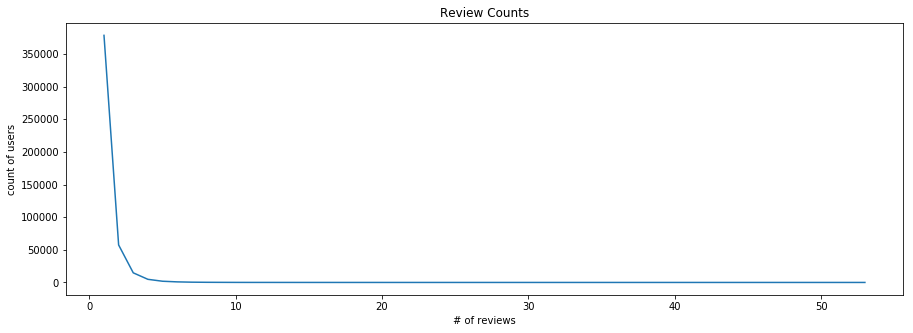

In [34]:
plt.figure(figsize=(15,5))
plt.plot(labels,counts)
plt.xlabel('# of reviews')
plt.ylabel('count of users')
plt.title('Review Counts')